In [1]:
import pandas as pd
import numpy as np
import altair as alt
import graphviz
alt.data_transformers.enable('csv')

DataTransformerRegistry.enable('csv')

In [27]:
df = pd.read_csv(r"C:\Users\Administrator\Repositories\logdeep\result\deeplog\times_result.csv")

In [28]:
df1 = pd.read_csv(r"C:\Users\Administrator\Repositories\GreenSecurity-FirstExperiment\Dell Inc. Latitude Latitude 7430 Windows 10\LogAnomalyDetection\Power Saver Plan\One Scan\Measurement 35\processes_data.csv")

In [31]:
time_unit = (df['end_time'] - df['start_time']).mean()

In [47]:
df1['Time(sec)'].diff().mean()/time_unit

74.44796483530142

<AxesSubplot: xlabel='Time(sec)'>

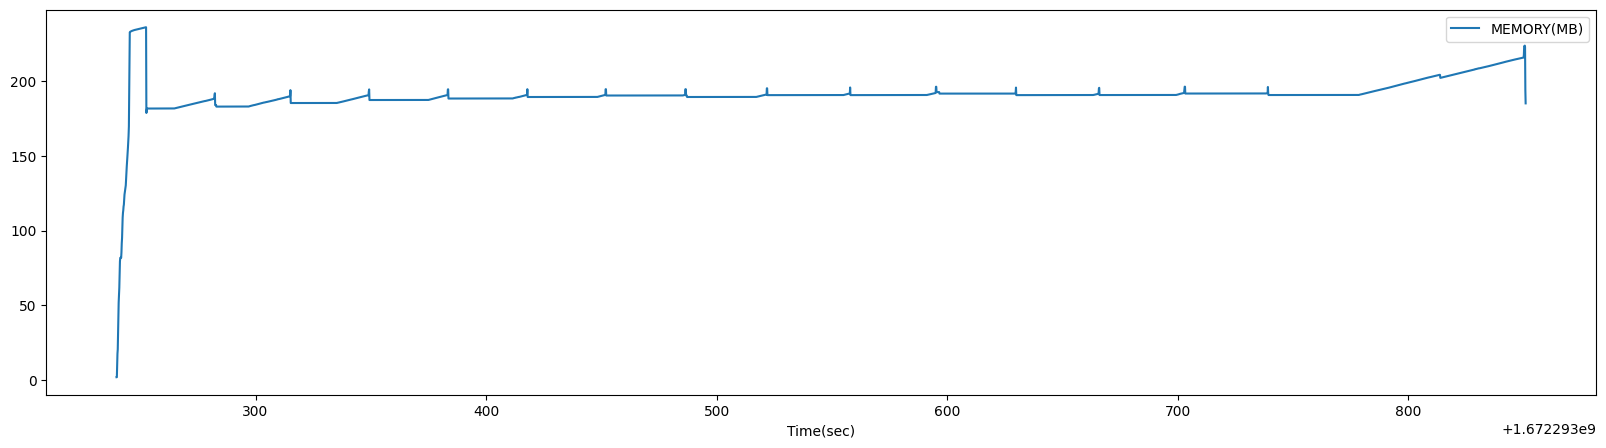

In [56]:
df1.plot(y='MEMORY(MB)', x='Time(sec)', figsize=(20,5))


In [30]:
import ast
df['logs_seq'] = df['logs_seq'].apply(lambda x: tuple(ast.literal_eval(x)))
df['new_log'] = df['new_log'].apply(lambda x: ast.literal_eval(x)[0])
df

,Unnamed: 0,start_time,logs_seq,new_log,dataset_type,end_time
0,0,1.672293e+09,"(4.0, 4.0, 4.0, 21.0, 10.0, 8.0, 10.0, 8.0, 10...",25,normal,1.672293e+09
1,0,1.672293e+09,"(4.0, 4.0, 21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8...",25,normal,1.672293e+09
2,0,1.672293e+09,"(4.0, 21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 2...",25,normal,1.672293e+09
3,0,1.672293e+09,"(21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, ...",22,normal,1.672293e+09
4,0,1.672293e+09,"(10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, 25.0, ...",22,normal,1.672293e+09
...,...,...,...,...,...,...
280600,49048,1.672294e+09,"(2.0, 3.0, 24.0, 17.0, 4.0, 15.0, 5.0, 25.0, 2...",24,abnormal,1.672294e+09
280601,49049,1.672294e+09,"(3.0, 24.0, 17.0, 4.0, 15.0, 5.0, 25.0, 25.0, ...",4,abnormal,1.672294e+09
280602,49050,1.672294e+09,"(4.0, 21.0, 4.0, 4.0, 10.0, 8.0, 25.0, 25.0, 1...",10,abnormal,1.672294e+09
280603,49051,1.672294e+09,"(21.0, 4.0, 4.0, 10.0, 8.0, 25.0, 25.0, 10.0, ...",8,abnormal,1.672294e+09


In [32]:
df.assign(cpu=[0]*len(df)) 
for i, row in df1.iterrows():
    cpu = row["CPU(%)"]
    start_time_df1 = row["Time(sec)"]
    if i == len(df1)-1:
        end_time_df1 = start_time_df1 + 5
    else:
        end_time_df1 = df1.iloc[i+1]["Time(sec)"]
    view = df[(df["start_time"]>=start_time_df1)&(df["end_time"]<end_time_df1)]
    if len(view):
        df.loc[view.index, "cpu"] = cpu#/len(view)
df["time"] = df["end_time"] - df.iloc[0]["start_time"]

In [33]:
# df[df['cpu']>0.5]

In [24]:
# q = df["cpu"].quantile(0.99999)
# df = df[df["cpu"] < q]

In [38]:
df.cpu = df.cpu.fillna(df.cpu.mean())

In [44]:
len(df1['CPU(%)'].unique())

54

In [42]:
len(df.cpu.unique())

50

In [40]:
alt.Chart(df).mark_bar(opacity=0.3,
    binSpacing=0).encode(
    alt.Color("dataset_type:N"),
    alt.Y("count()", stack=None),
    alt.X("cpu:Q", bin=alt.Bin(maxbins=50)),
)

c:\Users\Administrator\.conda\envs\py310\lib\site-packages\altair\utils\core.py:283: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [41]:
normal = df[df['dataset_type']=="abnormal"]
# group_normal = normal.groupby('cpu').count().reset_index()
alt.Chart(df).mark_bar().encode(
    alt.Color("cpu:Q"),
    alt.X("count()"),
    y='dataset_type:N',
)

alt.Chart(...)

In [123]:
model_data = df[df['dataset_type']=='normal'][['logs_seq', 'new_log', 'cpu']]
model_data

,logs_seq,new_log,cpu
0,"(4.0, 4.0, 4.0, 21.0, 10.0, 8.0, 10.0, 8.0, 10...",25,0.013765
1,"(4.0, 4.0, 21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8...",25,0.013765
2,"(4.0, 21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 2...",25,0.013765
3,"(21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, ...",22,0.013765
4,"(10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, 25.0, ...",22,0.013765
...,...,...,...
231547,"(3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, ...",22,0.003197
231548,"(2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 22.0,...",22,0.003197
231549,"(2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 22.0, 22.0...",20,0.003197
231550,"(3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 22.0, 22.0, 22....",20,0.003197


In [124]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split((model_data['logs_seq'].apply(lambda x: list(x))+model_data['new_log'].apply(lambda x: [x])).apply(pd.Series), 1000*model_data['cpu'] , test_size=0.33, random_state=42)
reg = tree.DecisionTreeRegressor(max_depth=5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)


0.4020453639900254

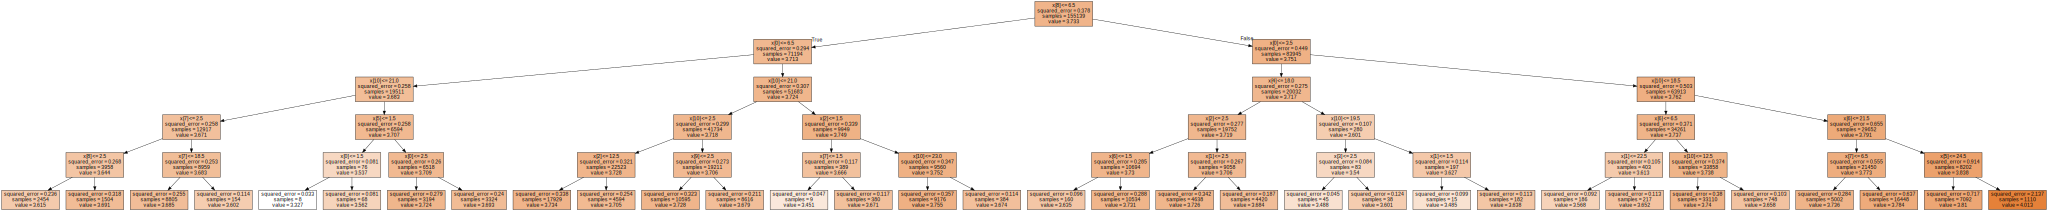

In [125]:
# DOT data
dot_data = tree.export_graphviz(reg, out_file=None, 
                                
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [126]:
max_arg_cpu_per_logs_seq = df.groupby('logs_seq').idxmax()['cpu']
max_arg_cpu_per_logs_seq.index = pd.MultiIndex.from_tuples(max_arg_cpu_per_logs_seq.index)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7568\1268036261.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.idxmax is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  max_arg_cpu_per_logs_seq = df.groupby('logs_seq').idxmax()['cpu']


In [127]:
from tqdm import tqdm
df['max_cpu_log'] = np.zeros(len(df))
for i, row in tqdm(df.iterrows()):
    df.loc[i, 'max_cpu_log'] = df.loc[max_arg_cpu_per_logs_seq.loc[row['logs_seq']],'new_log']

280605it [01:25, 3278.98it/s]


In [128]:
def generate(name):
    window_size = 10
    hdfs = {}
    length = 0
    with open('C:/Users/Administrator/Repositories/logdeep/data/hdfs/' + name, 'r') as f:
        for ln in f.readlines():
            ln = list(map(lambda n: n - 1, map(int, ln.strip().split())))
            ln = ln + [-1] * (window_size + 1 - len(ln))
            hdfs[tuple(ln)] = hdfs.get(tuple(ln), 0) + 1
            length += 1
    print('Number of sessions({}): {}'.format(name, len(hdfs)))
    return hdfs, length

In [129]:
group_df = df.groupby(['logs_seq', 'new_log']).mean()['max_cpu_log']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7568\597158971.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = df.groupby(['logs_seq', 'new_log']).mean()['max_cpu_log']


In [132]:
window_size = 10
test_normal_loader, test_normal_length = generate('hdfs_test_normal')
with open('C:/Users/Administrator/Repositories/logdeep/data/hdfs/hdfs_test_normal_good', 'w') as f:
    for line in test_normal_loader.keys():
        for i in range(len(line) - window_size):
            seq0 = line[i:i + window_size]
            label = line[i + window_size]
            if (seq0, label) not in group_df:
                print('fuck!')
                continue
            f.write(' '.join([str(x) for x in (list(seq0)+[label])]))
            f.write('\n')


Number of sessions(hdfs_test_normal): 14177
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fu

In [133]:
window_size = 10
test_normal_loader, test_normal_length = generate('hdfs_test_normal')
with open('C:/Users/Administrator/Repositories/logdeep/data/hdfs/hdfs_test_normal_mal', 'w') as f:
    for line in test_normal_loader.keys():
        for i in range(len(line) - window_size):
            seq0 = line[i:i + window_size]
            label = line[i + window_size]
            if (seq0, label) not in group_df:
                print('fuck!')
                continue
            max_cpu_log = group_df.loc[(seq0, label)]
            f.write(' '.join([str(x) for x in (list(seq0)+[max_cpu_log])]))
            f.write('\n')

Number of sessions(hdfs_test_normal): 14177
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fuck!
fu

In [81]:
len(line)

32

In [42]:
df[(df['new_log']!=df['max_cpu_log'])&(df['dataset_type'] == 'normal')]

,Unnamed: 0,start_time,logs_seq,new_log,dataset_type,end_time,cpu,time,max_cpu_log
36,27,1.671787e+09,"(21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, ...",1,normal,1.671787e+09,0.013765,0.137006,22.0
91,82,1.671787e+09,"(4.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, 2...",3,normal,1.671787e+09,0.013765,0.246003,22.0
138,129,1.671787e+09,"(21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, ...",3,normal,1.671787e+09,0.013765,0.337009,22.0
142,133,1.671787e+09,"(8.0, 10.0, 8.0, 25.0, 25.0, 25.0, 3.0, 2.0, 3...",22,normal,1.671787e+09,0.013765,0.344011,1.0
169,160,1.671787e+09,"(4.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, 2...",1,normal,1.671787e+09,0.013765,0.395008,22.0
...,...,...,...,...,...,...,...,...,...
231533,2847,1.671788e+09,"(4.0, 25.0, 10.0, 8.0, 25.0, 25.0, 10.0, 8.0, ...",2,normal,1.671788e+09,0.003197,506.195000,3.0
231536,2850,1.671788e+09,"(8.0, 25.0, 25.0, 10.0, 8.0, 10.0, 8.0, 2.0, 2...",1,normal,1.671788e+09,0.003197,506.200002,2.0
231537,2851,1.671788e+09,"(25.0, 25.0, 10.0, 8.0, 10.0, 8.0, 2.0, 2.0, 3...",3,normal,1.671788e+09,0.003197,506.202001,2.0
231540,2854,1.671788e+09,"(8.0, 10.0, 8.0, 2.0, 2.0, 3.0, 1.0, 3.0, 2.0,...",3,normal,1.671788e+09,0.003197,506.208000,2.0


In [83]:
test_normal_loader, test_normal_length = generate('hdfs_test_normal_good')

Number of sessions(hdfs_test_normal_good): 32913


{(3, 3, 3, 20, 9, 7, 9, 7, 9, 7, 24): 490,
 (3, 3, 20, 9, 7, 9, 7, 9, 7, 24, 24): 488,
 (3, 20, 9, 7, 9, 7, 9, 7, 24, 24, 24): 466,
 (20, 9, 7, 9, 7, 9, 7, 24, 24, 24, 21): 5,
 (9, 7, 9, 7, 9, 7, 24, 24, 24, 21, 21): 18,
 (7, 9, 7, 9, 7, 24, 24, 24, 21, 21, 21): 18,
 (9, 7, 9, 7, 24, 24, 24, 21, 21, 21, 19): 26,
 (7, 9, 7, 24, 24, 24, 21, 21, 21, 19, 19): 26,
 (9, 7, 24, 24, 24, 21, 21, 21, 19, 19, 19): 43,
 (3, 3, 20, 3, 9, 7, 9, 7, 9, 7, 24): 412,
 (3, 20, 3, 9, 7, 9, 7, 9, 7, 24, 24): 411,
 (20, 3, 9, 7, 9, 7, 9, 7, 24, 24, 24): 400,
 (3, 20, 3, 3, 9, 7, 9, 7, 9, 7, 24): 437,
 (20, 3, 3, 9, 7, 9, 7, 9, 7, 24, 24): 436,
 (3, 3, 9, 7, 9, 7, 9, 7, 24, 24, 24): 736,
 (3, 9, 7, 9, 7, 9, 7, 24, 24, 24, 21): 13,
 (20, 3, 3, 3, 9, 7, 9, 7, 9, 7, 24): 355,
 (3, 3, 3, 9, 7, 9, 7, 9, 7, 24, 24): 351,
 (20, 9, 7, 9, 7, 9, 7, 24, 24, 24, 0): 137,
 (9, 7, 9, 7, 9, 7, 24, 24, 24, 0, 21): 7,
 (7, 9, 7, 9, 7, 24, 24, 24, 0, 21, 21): 7,
 (9, 7, 9, 7, 24, 24, 24, 0, 21, 21, 21): 12,
 (7, 9, 7, 24, 24,

In [26]:
np.load(r'C:\Users\Administrator\Downloads\x_data.npy',allow_pickle=True)

array([list(['E5', 'E5', 'E5', 'E22', 'E11', 'E9', 'E11', 'E11', 'E9', 'E9', 'E26', 'E26', 'E26']),
       list(['E5', 'E22', 'E5', 'E5', 'E11', 'E9', 'E11', 'E9', 'E11', 'E9', 'E26', 'E26', 'E26']),
       list(['E5', 'E5', 'E5', 'E22', 'E11', 'E9', 'E11', 'E9', 'E11', 'E9', 'E26', 'E26', 'E26', 'E23', 'E23', 'E23', 'E21', 'E21', 'E21']),
       ...,
       list(['E5', 'E22', 'E5', 'E5', 'E11', 'E9', 'E11', 'E9', 'E26', 'E26', 'E11', 'E9', 'E26', 'E4', 'E4', 'E3', 'E2', 'E23', 'E23', 'E23', 'E21', 'E21', 'E21']),
       list(['E5', 'E5', 'E22', 'E5', 'E11', 'E9', 'E11', 'E9', 'E26', 'E26', 'E11', 'E9', 'E26', 'E23', 'E23', 'E23', 'E21', 'E21', 'E21']),
       list(['E5', 'E5', 'E5', 'E22', 'E11', 'E9', 'E11', 'E9', 'E11', 'E9', 'E26', 'E26', 'E26', 'E23', 'E23', 'E23', 'E21', 'E21', 'E21'])],
      dtype=object)